<a href="https://colab.research.google.com/github/babasxn/Titanic_Survival_Predictions/blob/main/Titanic_Survival_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Train Data Cleaning


In [ ]:
!unzip /content/titanic.zip

Archive:  /content/titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
testData=pd.read_csv("/content/test.csv")
trainData=pd.read_csv("/content/train.csv")

In [ ]:
trainData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
trainData.drop('Name',axis=1, inplace=True)

In [ ]:
trainData.drop('Embarked',axis=1, inplace=True)
trainData.drop('Ticket',axis=1, inplace=True)
trainData.drop('Cabin',axis=1, inplace=True)



In [ ]:
#trainData.drop('PassengerId',axis=1, inplace=True)

In [ ]:
trainData.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [ ]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [ ]:
trainData['Age']=trainData['Age'].fillna(value=trainData['Age'].mean())

In [ ]:
trainData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
trainData['Sex']=le.fit_transform(trainData['Sex'])

#1- Male, 0-Female

In [ ]:
trainData.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [ ]:
x = trainData.drop('Survived',axis = 1) # features
y = trainData['Survived'] # target



In [ ]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,1,22.000000,1,0,7.2500
1,2,1,0,38.000000,1,0,71.2833
2,3,3,0,26.000000,0,0,7.9250
3,4,1,0,35.000000,1,0,53.1000
4,5,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000
887,888,1,0,19.000000,0,0,30.0000
888,889,3,0,29.699118,1,2,23.4500
889,890,1,1,26.000000,0,0,30.0000


In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler() # Min Max scalar

for col in x.columns:
  x[col] = ss.fit_transform(x[col].values.reshape((-1,1)))


In [ ]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,-1.730108,0.827377,0.737695,-0.592481,0.432793,-0.473674,-0.502445
1,-1.726220,-1.566107,-1.355574,0.638789,0.432793,-0.473674,0.786845
2,-1.722332,0.827377,-1.355574,-0.284663,-0.474545,-0.473674,-0.488854
3,-1.718444,-1.566107,-1.355574,0.407926,0.432793,-0.473674,0.420730
4,-1.714556,0.827377,0.737695,0.407926,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...,...
886,1.714556,-0.369365,0.737695,-0.207709,-0.474545,-0.473674,-0.386671
887,1.718444,-1.566107,-1.355574,-0.823344,-0.474545,-0.473674,-0.044381
888,1.722332,0.827377,-1.355574,0.000000,0.432793,2.008933,-0.176263
889,1.726220,-1.566107,0.737695,-0.284663,-0.474545,-0.473674,-0.044381


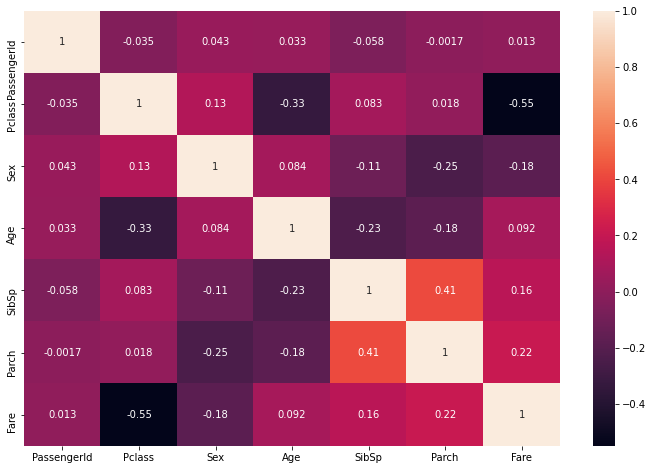

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(x.corr(),annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=12)



#Test Data Cleaning

In [ ]:
testData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
testData.drop('Name',axis=1, inplace=True)
testData.drop('Embarked',axis=1, inplace=True)
testData.drop('Ticket',axis=1, inplace=True)
testData.drop('Cabin',axis=1, inplace=True)

In [ ]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 23.0+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
testData['Sex']=le.fit_transform(testData['Sex'])

#1- Male, 0-Female

In [ ]:
testData['Age']=testData['Age'].fillna(value=trainData['Age'].mean())

In [ ]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [ ]:
from sklearn.linear_model import LinearRegression

# Model object
lr = LinearRegression(normalize=True)

pclass = trainData['Pclass'].values.reshape((-1,1)) 
fare = trainData['Fare'].values.reshape((-1,1))

lr.fit(pclass, fare) # fit the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
testData[testData['Fare'].isnull() == True]['Pclass']

152    3
Name: Pclass, dtype: int64

In [ ]:
lr.predict([[3]])

array([[9.6240965]])

In [ ]:
testData.fillna(9.63, inplace = True)

In [ ]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [ ]:
forTest=pd.DataFrame({"PassengerID": testData['PassengerId']})
forTest
#testData.drop('PassengerId',axis=1, inplace=True)

,PassengerID
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


#Modelling

In [ ]:
from sklearn.base import clone 

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV # This is for hyperparamter tuning
from sklearn.metrics import accuracy_score # to mesasure the accuracy of the model
from sklearn.neighbors import KNeighborsClassifier # To use the knn algorithm

# KNN--> K- Nearest negihbors
knn = KNeighborsClassifier() 

# Set parameters
n_neighbors = list(np.arange(3, 200, 2)) #---> last element
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
p = [1,2] #--> Distance: Euclidean and Manhattan

# dictonary for parameters
params = {'n_neighbors' : n_neighbors,
          'weights' : weights,
          'algorithm' : algorithm,
          'p' : p
          }

# RSCV
GSCV_Knn = GridSearchCV(knn, params, scoring='accuracy', n_jobs=-1, cv = 5, verbose=1) # n_iter = 20

# FIt the model
GSCV_Knn.fit(x, y)

Fitting 5 folds for each of 1584 candidates, totalling 7920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 2760 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 6760 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 7920 out of 7920 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29, 31, 33, 35, 37, 39, 41, 43,
                                         45, 47, 49, 51, 53, 55, 57, 59, 61, ...],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
GSCV_Knn.best_estimator_


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=1,
                     weights='uniform')

In [ ]:
KNN_best_model = clone(GSCV_Knn.best_estimator_)


In [ ]:
KNN_best_model # best KNN modell


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=1,
                     weights='uniform')

In [ ]:
GSCV_Knn.score(x, y)*100


84.84848484848484

#Predictions

In [ ]:
predictions = GSCV_Knn.predict(testData)

In [ ]:
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
df=pd.DataFrame({"PassengerId": forTest['PassengerID'], "Survived":predictions})


In [ ]:
display(df)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
df.to_csv('Titanic_prediction2',index=False)